<HTML>
    <BODY>
        <H1 style="color:#e320c2">Qu’est-ce que le segmentation?</H1>
        <P>En vision par ordinateur, la segmentation d'image est le processus de partitionnement d'une image en plusieurs segments. Le but de la segmentation d'une image est de changer la représentation d'une image en quelque chose de plus significatif et plus facile à analyser. Il est généralement utilisé pour localiser des objets et créer des limites.

Ce n'est pas une bonne idée de traiter une image entière car de nombreuses parties d'une image peuvent ne pas contenir d'informations utiles. Par conséquent, en segmentant l'image, nous pouvons utiliser uniquement les segments importants pour le traitement.

Une image est essentiellement un ensemble de pixels donnés. Dans la segmentation d'image, les pixels qui ont des attributs similaires sont regroupés. La segmentation d'image crée un masque par pixel pour les objets dans une image, ce qui nous donne une compréhension plus complète et granulaire de l'objet.</P>
       </BODY>
</HTML>

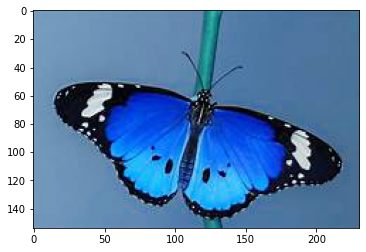

In [4]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('papillon.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('papillon2.jpg', quant)
plt.imshow(image)

cv2.imread('papillon.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

<html>
    <body>
        <h1 style="color:#e320c2"><B>Bruitage</B></h1>
        <p>Dans une image numérique on appelle bruit numérique toute fluctuation parasite ou dégradation que subit l'image de l'instant de son acquisition jusqu'à son enregistrement. Le bruit numérique est une notion générale à tout type d'image numérique, et ce quel que soit le type du capteur à l'origine de son acquisition (appareil photo numérique, scanner, caméra thermique...etc). Les sources de bruit numérique sont multiples, certaines sont physiques liées à la qualité de l’éclairage, de la scène, la température du capteur1, la stabilité du capteur de l'image durant l'acquisition, d'autres apparaissent durant la numérisation de l'information</p>
    </body>
</html>

In [5]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="papillon.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="papillon.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
#interaction
interact(plotnoise,mode=["gaussian","localvar","poisson", "salt","pepper","s&p","speckle"]);

 

plt.show()
#bruit_gaussian=plotnoise(img, "gaussian", r,c,1)
#cv2.imwrite('bruit_gaussian.jpg', bruit_gaussian)
#bruit_localvar=plotnoise(img, "localvar", r,c,2)
#bruit_poisson=plotnoise(img, "poisson", r,c,3)
#bruit_salt=plotnoise(img, "salt", r,c,4)
#bruit_pepper=plotnoise(img, "pepper", r,c,5)
#bruit_sp=plotnoise(img, "s&p", r,c,6)
#bruit_speckle=plotnoise(img, "speckle", r,c,7)
#none=plotnoise(img, None, r,c,8)



<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'poisson', 'salt', 'pepper…

<html>
    <body>
        <h1 style="color:#e320c2"><B>Median Filtre</B></h1>
        <p>Un filtre médian est un filtre qui lisse et supprime le bruit des images. En appliquant ce filtre, vous pouvez rendre l'image entière floue.

Ce filtre remplace le pixel d'intérêt par la valeur médiane des pixels périphériques.

De plus, comme dans le temps précédent, le traitement de filtrage ne peut pas être effectué sur le bord de l'image, donc un traitement de remplissage à 0 utilisant 0 est effectué pour les pixels inexistants.</p>
    </body>
</html>

In [7]:
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics
from PIL import Image, ImageFilter

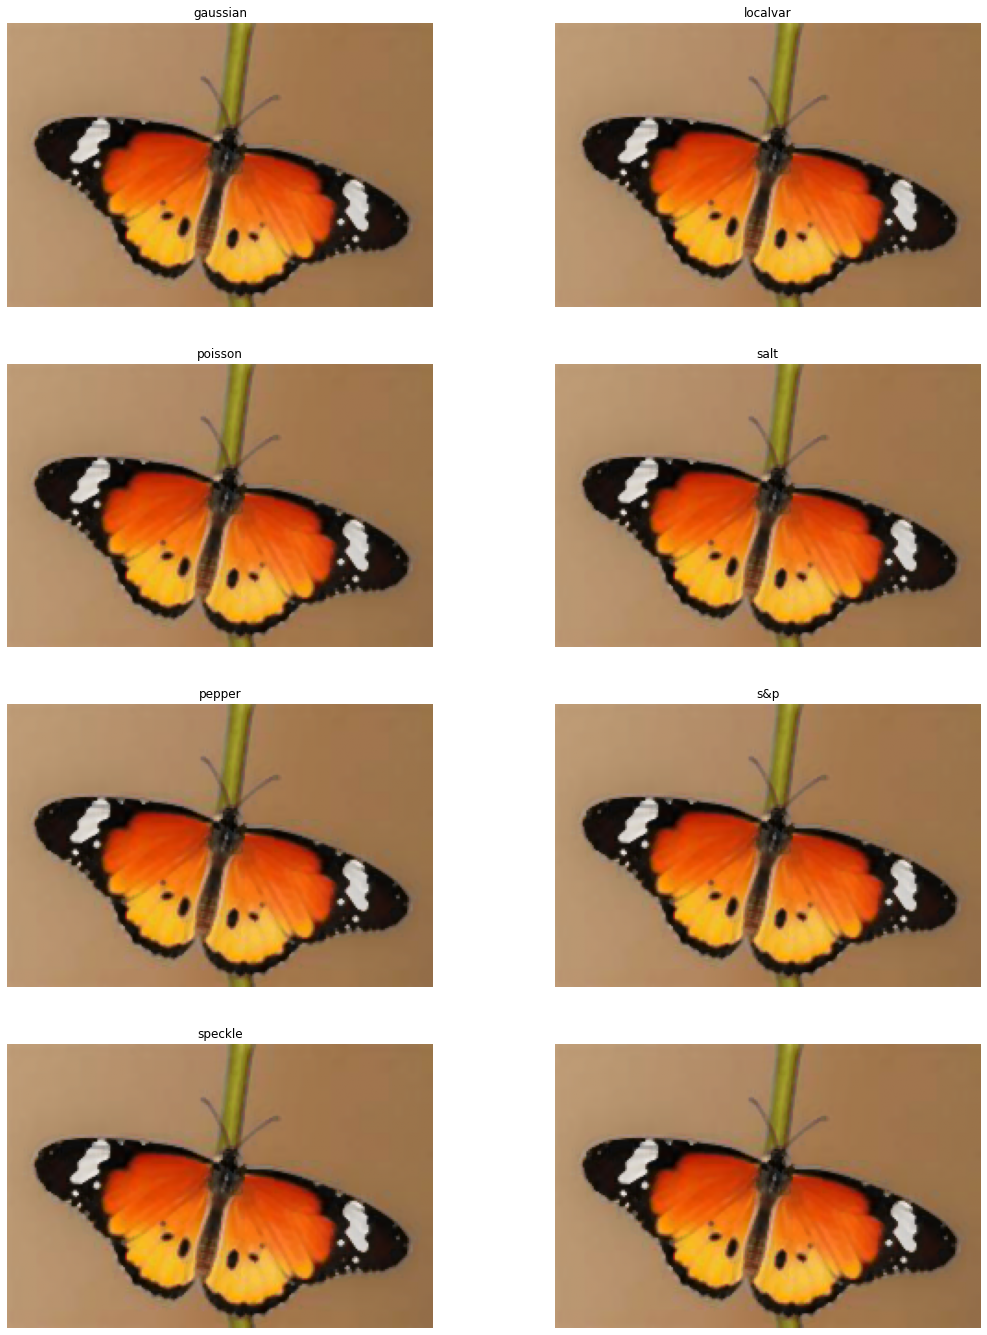

In [8]:
img_path="papillon.jpg"
img = skimage.io.imread(img_path)/255.0
def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, "localvar", r,c,2)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, "poisson", r,c,3)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, "salt", r,c,4)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, "pepper", r,c,5)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, "s&p", r,c,6)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, "speckle", r,c,7)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plotnoise(img, None, r,c,8)
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered, cmap='gray')
plt.show()



<html>
    <body>
        <h1 style="color:#e320c2"><B>Filtre gaussien</B></h1>
        <p>Le filtre gaussien est similaire au filtre moyen mais il implique une moyenne pondérée des pixels environnants et a un paramètre sigma. Le noyau représente une approximation discrète d'une distribution gaussienne. Alors que le filtre gaussien brouille les bords d'une image (comme le filtre moyen), il fait un meilleur travail de préservation des bords qu'un filtre moyen de taille similaire. La fonction 'GaussianBlur' du package Open-CV peut être utilisée pour implémenter un filtre gaussien. La fonction vous permet de spécifier la forme du noyau. Vous pouvez également spécifier l'écart type pour les directions x et y séparément. Si une seule valeur sigma est spécifiée, elle est considérée comme la valeur sigma pour les directions x et y.</p>
    </body>
</html>

In [9]:
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics
from PIL import Image, ImageFilter

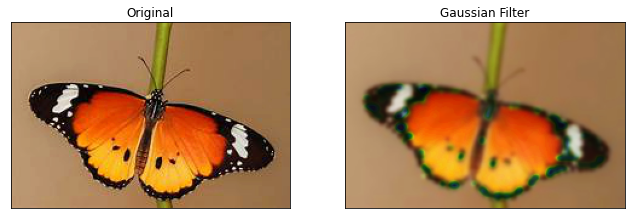

In [10]:
figure_size = 9
img_path= cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
new_image = cv2.GaussianBlur(img_path, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_path, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


<html>
    <body>
        <h1 style="color:#e320c2"><B>Clustering</B></h1>
        <p>K Means est un algorithme de clustering. Les algorithmes de clustering sont des algorithmes non supervisés, ce qui signifie qu’aucune donnée étiquetée n’est disponible. Il est utilisé pour identifier différentes classes ou groupes dans les données données en fonction de la similitude des données. Les points de données du même groupe sont plus similaires aux autres points de données de ce même groupe que ceux des autres groupes. 

Le clustering K-means est l’un des algorithmes de clustering les plus couramment utilisés. Ici, k représente le nombre de clusters.

Voyons comment fonctionne le clustering K-means –

1/Choisissez le nombre de clusters que vous souhaitez trouver, soit k.
2/Attribuez au hasard les points de données à l’un des k clusters.
3/Calculez ensuite le centre des grappes.
4/Calculez la distance entre les points de données et les centres de chacun des clusters.
5/En fonction de la distance entre chaque point de données et le cluster, réaffectez les points de données aux clusters les plus proches.
6/Calculez à nouveau le nouveau centre de cluster.
Répétez les étapes 4, 5 et 6 jusqu’à ce que les points de données ne changent pas les clusters, ou jusqu’à ce que nous atteignions le nombre d’itérations attribué.</p>
    </body>
</html>

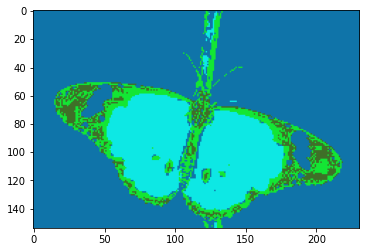

In [16]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img_path.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img_path.shape))
 
plt.imshow(segmented_image)